# An example of DCNN - LeNet

- we will be using mnist dataset.
- convolutional layers will also be used accordingly 
.

In [62]:
# importing the required libraries and modules

import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

# checking tensorflow version

print(tf.__version__)

2.1.0


In [83]:
#  network and training variables

EPOCHS = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = tf.keras.optimizers.Adam()
VALIDATION_SPLIT = 0.33         # using 33% percent of training dataset as validation dataset.

IMG_ROWS, IMG_COLS = 28, 28     #image rows and columns
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
NB_CLASSES = 10     #number of output = number of digits

In [64]:
#  defining the convnet

def build(input_shape, classes):
    
    """function to define the model """
    
    model = models.Sequential()
    
    
    #CONV => RELU => POOL
    model.add(layers.Convolution2D(20, (5, 5), activation = 'relu', input_shape = input_shape))
    model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
    
    
    #CONV => RELU => POOL
    # HERE NUMBER OF CONVOLUTION FILTER WILL INCREASE TO 50
    
    model.add(layers.Convolution2D(50, (5, 5), activation = 'relu'))
    model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
    
    
    # Then we have a pretty standard flattening and a dense network of 500 (50 X 10) neurons
    # followed by a softmax classifier with 10 classes because 10 output.
    
    # FLATTEN => RELU layers
    
    model.add(layers.Flatten())
    model.add(layers.Dense(500, activation = 'relu'))
    
    # a softmax classifier
    
    model.add(layers.Dense(classes, activation = "softmax"))
    
    return model
    

now we will import dataset ans pre process it for further predictions.


In [65]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [66]:
x_train.shape

(60000, 28, 28)

In [67]:
# reshaping the data

x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

In [68]:
#normalizing the datasets by bringing the pixel value in range(0, 1)

x_train, x_test = x_train / 255.0, x_test / 255.0

In [69]:
# casting the data type of input data

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [70]:
# converting class vectors to binary class metrics(one hot verctor)

y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)

In [71]:
# INITIALIZE THE DEFINED MODEL AND OPTIMIZER

model = build(input_shape = INPUT_SHAPE, classes = NB_CLASSES)
model.compile(loss = "categorical_crossentropy", optimizer = OPTIMIZER,
             metrics = ["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 50)          25050     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 50)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               400500    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [72]:
# use tensorboard to visualize

callbacks = [
    # Write TensorBoard logs to './logs' directory
    tf.keras.callbacks.TensorBoard(log_dir = './logs')
]

Train on 40199 samples, validate on 19801 samples
Epoch 1/20
40199/40199 [==============================] - 31s 773us/sample - loss: 0.2413 - accuracy: 0.9267 - val_loss: 0.0882 - val_accuracy: 0.9718
Epoch 2/20
40199/40199 [==============================] - 31s 782us/sample - loss: 0.0613 - accuracy: 0.9809 - val_loss: 0.0587 - val_accuracy: 0.9818
Epoch 3/20
40199/40199 [==============================] - 31s 776us/sample - loss: 0.0416 - accuracy: 0.9867 - val_loss: 0.0532 - val_accuracy: 0.9844
Epoch 4/20
40199/40199 [==============================] - 31s 776us/sample - loss: 0.0290 - accuracy: 0.9905 - val_loss: 0.0551 - val_accuracy: 0.9839
Epoch 5/20
40199/40199 [==============================] - 31s 773us/sample - loss: 0.0252 - accuracy: 0.9918 - val_loss: 0.0436 - val_accuracy: 0.9868
Epoch 6/20
40199/40199 [==============================] - 31s 762us/sample - loss: 0.0185 - accuracy: 0.9938 - val_loss: 0.0604 - val_accuracy: 0.9820
Epoch 7/20
40199/40199 [====================

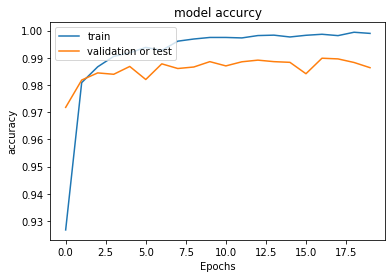

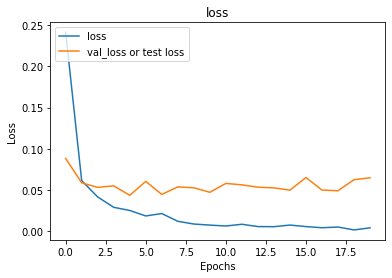

In [73]:
# fitting the model or training the model

history = model.fit(x_train, y_train, batch_size = BATCH_SIZE, epochs = EPOCHS,
                   verbose = VERBOSE, validation_split = VALIDATION_SPLIT,
                   callbacks = callbacks)


# plotting for train and validation accuracy for each epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accurcy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'validation or test'], loc = 'upper left')
plt.show()


#plotting for training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss or test loss'], loc = 'upper left')
plt.show()

In [77]:
# predicting

score = model.evaluate(x_test, y_test)
print("\nTest score : ", score[0])
print("Test Accuracy : ", score[1])

10000/10000 [==============================] - 3s 292us/sample - loss: 0.0564 - accuracy: 0.9868

Test score :  0.056416880939094846
Test Accuracy :  0.9868


# first epochs = 5 => test acc = 94%
# second epochs = 20 => test_acc = 97.38%

- by looking at plots of loss and accuracy we can have a eye over number of epochs`

In [82]:
# finding model keywords to check values of loss and accuracy for further information


history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])